# Spectral Flatness  
https://en.wikipedia.org/wiki/Spectral_flatness#cite_note-Signal_Processing_Letters-2    


$$ \text{SpectralFlatness} = \frac{\text{GeometricMean}}{\text{ArithmeticMean}} $$

In [37]:
import numpy as np
import librosa

from scipy.stats.mstats import gmean

In [52]:
x,fs = librosa.load("data/wav/with_transient_noise_2.wav",16000)
#x,fs = librosa.load("data/wav/noisy.wav",16000)
print(x.shape)

(190613,)


(257, 1490)


(257, 1490)


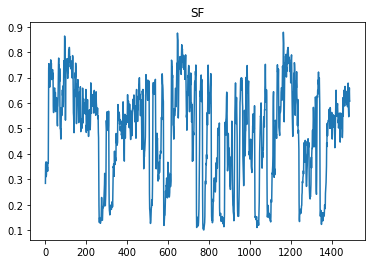

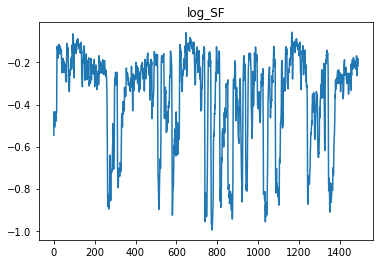

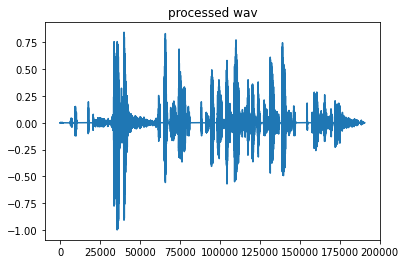

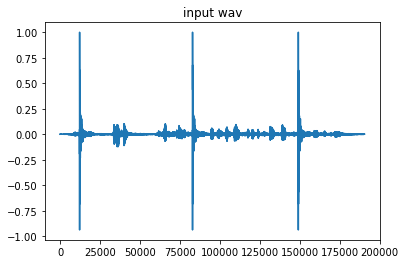

In [106]:
X = librosa.stft(x,n_fft=512)
mag_X = np.abs(X)
print(X.shape)

log_SF = np.zeros(X.shape[1])
SF = np.zeros(X.shape[1])
for i in range(X.shape[1]) : 
    #m_G = np.exp(np.sum(np.log(X[:,i])) /257)
    
    m_G = gmean(mag_X[15:,i])
    m_A = np.mean(mag_X[15:,i])
    
    
    SF[i] = m_G/(m_A + 1e-16)
    log_SF[i] = np.log10(SF[i])
    
    if log_SF[i] > -0.2 :
        if i > 2 : 
            X[:,i-2:i+2] = 0

import matplotlib.pyplot as plt    
plt.figure()
plt.title("SF")
plt.plot(SF)

plt.figure()
plt.title("log_SF")
plt.plot(log_SF)

y = librosa.istft(X)

plt.figure()
plt.title("processed wav")
y = y/np.max(np.abs(y))
plt.plot(y)

plt.figure()
plt.title("input wav")
x= x/np.max(np.abs(x))
plt.plot(x)